# Napoleon’s march

#### by Yicheng Shen

One of the most famous data visualizations of all time is Charles Joseph Minard’s depiction of Napoleon’s disastrous Russian campaign in 1812. Here I recreate the map in python. 

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cities = pd.read_csv("data/cities.csv")
temps = pd.read_csv("data/temperatures.csv")
troops = pd.read_csv("data/troops.csv")

In [4]:
subset_1 = troops[troops['group'] == 1]
subset_2 = troops[troops['group'] == 2]
subset_3 = troops[troops['group'] == 3]

In [5]:
for i in subset_1.index[:-1]:
    if subset_1.iloc[i,2] != subset_1.iloc[i+1,2]:
        one_row = subset_1.iloc[i+1:i+2].copy()
        one_row.at[i+1, 'survivors'] = subset_1.iloc[i, 2]
        subset_1 = pd.concat([subset_1, one_row], axis=0)

for i in range(len(subset_2.index[:-1])):
    if subset_2.iloc[i,2] != subset_2.iloc[i+1,2]:
        one_row = subset_2.iloc[i+1:i+2].copy()
        one_row["survivors"] = subset_2.iloc[i, 2]
        subset_2 = pd.concat([subset_2, one_row], axis=0)
        
for i in range(len(subset_3.index[:-1])):
    if subset_3.iloc[i,2] != subset_3.iloc[i+1,2]:
        one_row = subset_3.iloc[i+1:i+2].copy()
        one_row["survivors"] = subset_3.iloc[i, 2]
        subset_3 = pd.concat([subset_3, one_row], axis=0)

troops_all = pd.concat([subset_1, subset_2, subset_3], axis=0).reset_index()

In [6]:
troops_all['direction']=troops_all['direction'].astype('category')
troops_all['direction']=troops_all['direction'].cat.reorder_categories(['retreating','advancing'])

In [7]:
troops_retreat = troops[troops['direction'] == "retreating"]
temps_lat = pd.merge(temps, troops_retreat, on = "long", how = 'left')
# print(temps_lat[temps_lat.isna().any(axis=1)])
temps_lat.iloc[[0, 1, 2, 8 ,9, 10],5] = [55.7, 55.1, 54.75 , 54.4, 54.3, 54.3]

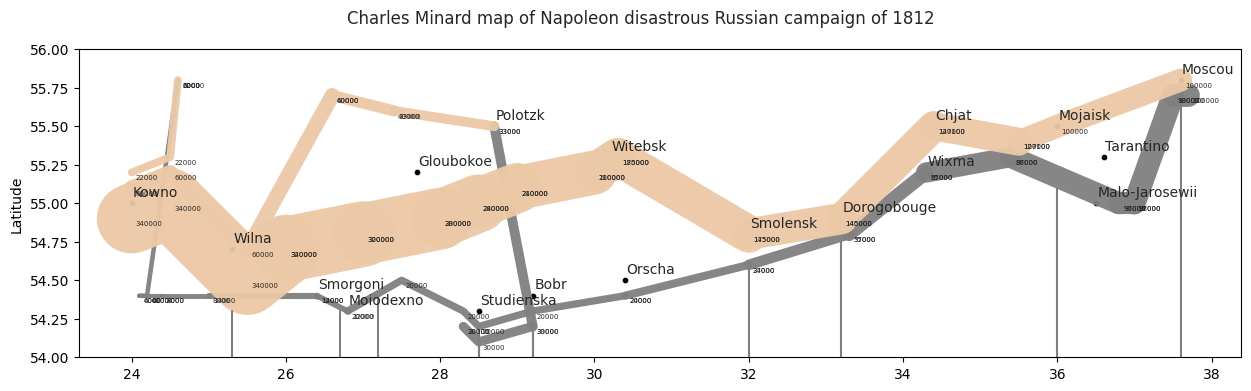

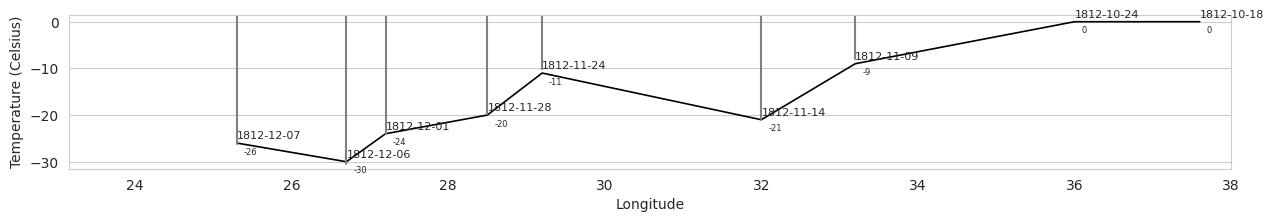

In [8]:
# Create first plot
fig, ax1 = plt.subplots(figsize = (15, 4))

sns.set_style("whitegrid", {'axes.grid' : False})

colors = {'retreating': 'gray', 'advancing': '#ECC9A6'}
palette = sns.set_palette(colors.values())

sns.lineplot(ax=ax1, x='long', y='lat', data=troops_all, hue = "direction", legend = False, 
             palette = palette, alpha = 0.95, markers=True,
             size = "survivors", sizes = (3,50))

sns.scatterplot(ax=ax1, x='long', y='lat', data=cities, color='k', s = 20, legend = False)

plt.ylim(54, 56)
plt.ylabel("Latitude")
plt.xlabel("")

for i, row in cities.iterrows():
    plt.annotate(row['city'], (row['long'], row['lat']), xytext=(1,5), textcoords='offset points', fontsize=10)

for j, row in troops_all.iterrows():
    plt.annotate(row['survivors'], (row['long'], row['lat']), xytext=(3,-5), textcoords='offset points', fontsize=5)

for i in range(11):
    long = temps_lat.iloc[i,][0]
    lat = temps_lat.iloc[i,][5]
    plt.axvline(x=long, ymin=0, ymax=(lat-54)/2)
    
fig.suptitle('Charles Minard map of Napoleon disastrous Russian campaign of 1812', fontsize=12)


# Create second plot
fig, ax2 = plt.subplots(figsize = (15, 2))
plt.grid(axis = 'y')  

sns.lineplot(x = 'long', y = 'temp', ax = ax2, data = temps, color = "k", linewidth = 1.2)

plt.ylabel("Temperature (Celsius)")
plt.xlabel("Longitude")
plt.xlim(23.15, 38)

# ax2.yaxis.set_label_position("right")
# ax2.yaxis.tick_right()

for i, row in temps.iterrows():
    plt.annotate(row['date'], (row['long'], row['temp']), xytext=(0, 3), textcoords='offset points', fontsize=8)
    plt.annotate(row['temp'], (row['long'], row['temp']), xytext=(5, -8), textcoords='offset points', fontsize=6)

plt.subplots_adjust(hspace=0.5)

for i in range(9):
    long = temps.iloc[i,][0]
    temperature = temps.iloc[i,][1]
    plt.axvline(x=long, ymin=1+temperature/31, ymax=1)
